In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

### Read in data

In [2]:
train = pd.read_csv("train.csv", index_col = 0).drop(["action_taken_name",
                                                      "agency_name",
                                                      "state_name",
                                                     "as_of_year",
                                                     "sequence_number"], axis = 1)
test = pd.read_csv("test.csv", index_col = 0).drop(["action_taken_name",
                                                    "agency_name",
                                                    "state_name",
                                                   "as_of_year",
                                                   "sequence_number"], axis = 1)

C:\Python36\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Python36\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Processing and Manipulation

In [3]:
cats = ["state_abbr", "purchaser_type_name", "property_type_name", "preapproval_name",
        "owner_occupancy_name", "msamd_name", "loan_type_name", "loan_purpose_name",
        "lien_status_name", "hoepa_status_name", "denial_reason_name_1","denial_reason_name_2",
        "county_name", "co_applicant_sex_name", "co_applicant_race_name_1",
        "co_applicant_ethnicity_name", "applicant_sex_name", "applicant_race_name_1",
        "applicant_ethnicity_name", "agency_abbr", "approved", "denial_reason_name_3"]

In [4]:
# min-max normalizes a column cat of dataset df
# returns that column as pandas series
def normalize(df, cat):
    xmin = df[cat].min()
    xmax = df[cat].max()
    return (df[cat] - xmin) / (xmax - xmin)

In [5]:
# Data manipulation

all_data = pd.concat([train, test])

cats = ["state_abbr", "purchaser_type_name", "property_type_name", "preapproval_name",
        "owner_occupancy_name", "msamd_name", "loan_type_name", "loan_purpose_name",
        "lien_status_name", "hoepa_status_name", "denial_reason_name_1","denial_reason_name_2",
        "county_name", "co_applicant_sex_name", "co_applicant_race_name_1",
        "co_applicant_ethnicity_name", "applicant_sex_name", "applicant_race_name_1",
        "applicant_ethnicity_name", "agency_abbr", "approved", "denial_reason_name_3"]

# normalizing numerical columns
num_cols = [elem for elem in all_data.columns if elem not in cats]
for col in num_cols:
    all_data[col] = normalize(all_data, col)

# Replacing categorical strings with integers
for cat in cats:
    all_data[cat] = pd.Categorical(all_data[cat]).codes

# Filling in all numerical NAs with -1
all_data = all_data.fillna(-1)


x = all_data.drop(["approved"], axis = 1)
y = np.ravel(all_data["approved"])

### Model

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
pred = model.predict(x_test)
print("Accuracy: %f" % metrics.accuracy_score(y_test, pred))
print("Proportion of 1-class: %f" % y_test.mean())
print("F1 Score: %f" % metrics.f1_score(y_test, pred))

Accuracy: 0.937308
Proportion of 1-class: 0.805890
F1 Score: 0.962222


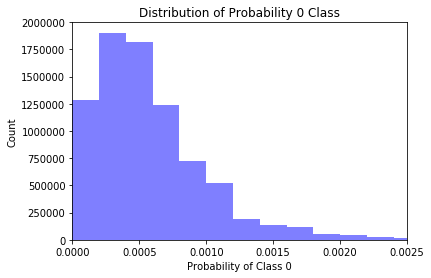

In [27]:
num_bins = 10000

n, bins, patches = plt.hist(all_data["loan_amount_000s"], num_bins, facecolor='blue', alpha=0.5)
plt.xlim(0, 0.0025)
plt.xlabel('Probability of Class 0')
plt.ylabel('Count')
plt.title('Distribution of Probability 0 Class')

plt.show()

In [ ]:
def calc_dem_parity():
    return

In [12]:
test_new = x_test.copy(deep = True)
test_new["approved"] = y_test
test_new["pred"] = pred

In [14]:
test_new.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_abbr,...,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,census_tract_number,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_abbr,approved,pred
1411738,0.268686,-1.0,0.142886,0.2701,0.097752,0.109251,0.000271,0.435609,0.000064,3,...,2,4,2,0.050511,1,4,0,0,0,0
1626145,0.210712,-1.0,0.132721,0.2611,0.104409,0.104368,0.000266,0.369058,0.000059,18,...,2,4,2,0.002103,1,4,1,3,0,0
1962572,0.053520,-1.0,0.041162,0.9124,0.011573,0.030680,0.000129,0.455488,0.000038,34,...,2,4,2,0.007801,1,4,0,4,0,1
3110779,0.221274,-1.0,0.057236,0.0503,0.055302,0.145760,0.000545,0.403630,0.000398,34,...,2,4,2,0.080208,0,4,1,5,1,1
136847,0.200800,-1.0,0.058946,0.5583,0.041170,0.038754,0.001052,0.624028,0.000162,4,...,2,4,2,0.075211,0,4,1,4,1,1


### Cross-Validation

In [6]:
scores = cross_val_score(LogisticRegression(), x, y, cv=5, scoring='f1')
print(scores)

C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.96189439 0.96186615 0.96185484 0.96066683 0.96248356]
